In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## One condition HDDM 
#### Load data and check data head
##### Use anxious.csv

In [3]:
# Load data from csv file into a NumPy structured array
data1CAnx = hddm.load_csv('./rt_dataframes/anxious.csv')
data1CAnx.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,ff1d7a9a28686c2b,2217.0,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1424.0,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1805.0,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1477.0,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1257.0,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1564.0,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1421.0,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1492.0,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1196.0,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1572.0,0.0,101,12.0,-5.0,0.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [4]:
data1CAnx = data1CAnx.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data1CAnx['rt'] = data1CAnx['rt']/1000
data1CAnx.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,ff1d7a9a28686c2b,2.217,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1.424,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1.805,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1.477,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1.257,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1.564,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1.421,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1.492,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1.196,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1.572,0.0,101,12.0,-5.0,0.0,1.0


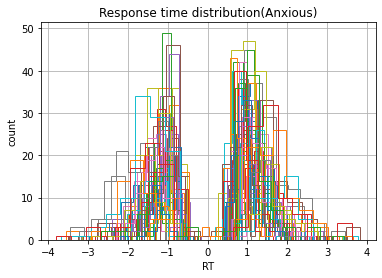

In [17]:
#flip the error RTs to be negative
data1CAnx = hddm.utils.flip_errors(data1CAnx)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Anxious)')
for i, subj_data in data1CAnx.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM1C(separate)/rt_distribution(anx).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [18]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data1CAnx, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM1C(separate)/traces(1CAnx)', db='pickle')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 524.7 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


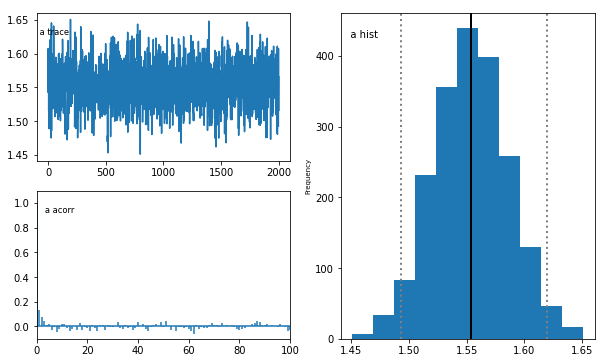

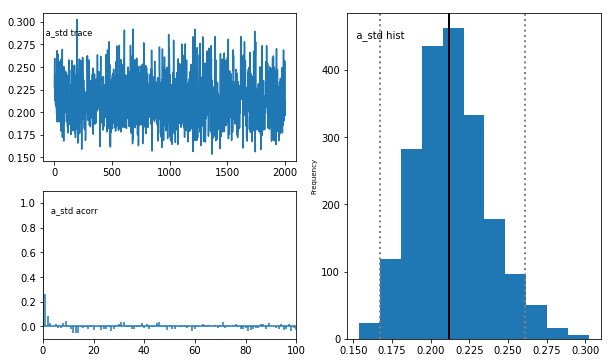

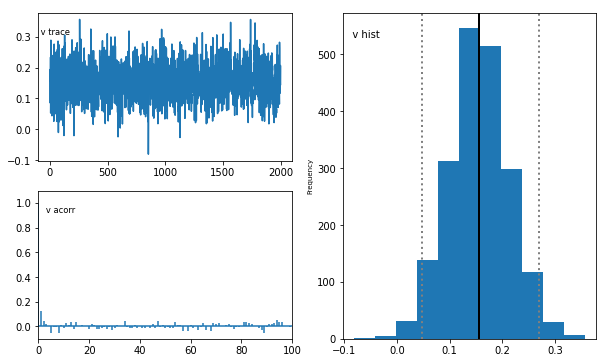

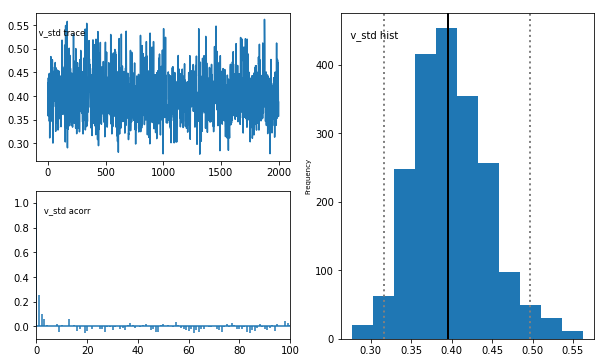

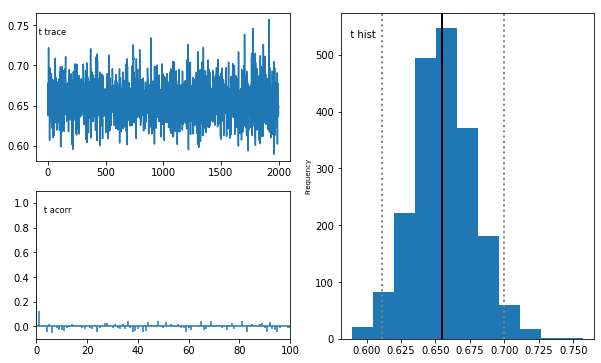

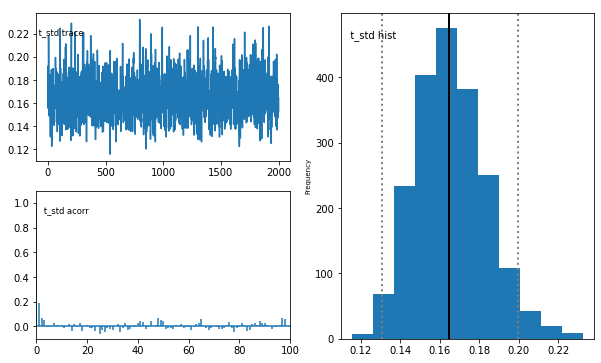

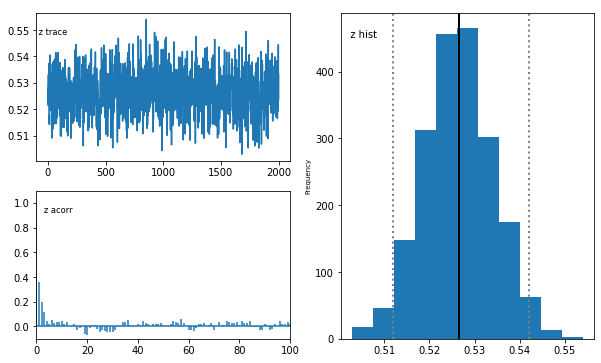

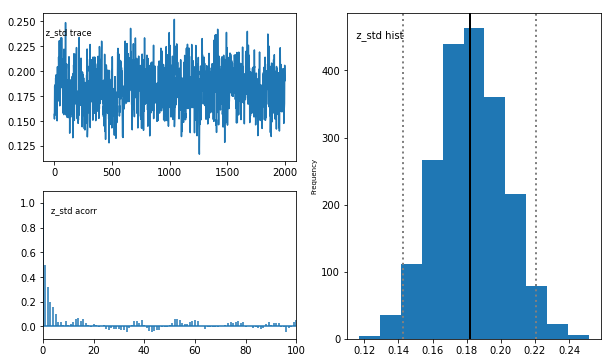

In [19]:
#plot posterior samples
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [22]:
stats1CAnx = m.gen_stats()
stats1CAnx.to_csv('./fitting_results/HDDM/HDDM1C(separate)/HDDM1CAnx.csv', sep=',')
stats1CAnx[stats1CAnx.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.55388,0.0320253,1.49132,1.53273,1.55352,1.57592,1.61847,0.000775488
a_std,0.213448,0.0237798,0.17164,0.196863,0.211736,0.228271,0.267757,0.000680326
v,0.156149,0.057125,0.0454284,0.119009,0.155868,0.193691,0.268845,0.00131705
v_std,0.399296,0.0459074,0.320068,0.36712,0.39601,0.428224,0.504788,0.00147399
t,0.656057,0.022435,0.612929,0.641482,0.655053,0.67072,0.701814,0.000553586
t_std,0.165667,0.0179734,0.134802,0.152966,0.164553,0.176762,0.205833,0.00055881
z,0.526403,0.00765226,0.511408,0.52122,0.526478,0.531438,0.541718,0.000288617
z_std,0.182241,0.0201053,0.143612,0.168203,0.1819,0.196236,0.222805,0.000849095


In [23]:
m.dic

15587.766492974257

## Check for Model convergence

In [10]:
# Set up models list to append results
models = list()

In [11]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM1C(separate)/chain_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM1C(separate)/chain1CCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [12]:
num_chains = 5
data_chains = [(data1CAnx,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 1Fitting chain 0Fitting chain 2Fitting chain 3



Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------100%-----------------] 3001 of 3000 complete in 513.4 sec               0%                  ] 5 of 3000 complete in 0.7 sec  [                  0%                  ] 5 of 3000 complete in 0.7 sec[                  0%                  ] 5 of 3000 complete in 0.7 sec[                  0%                  ] 5 of 3000 complete in 0.7 sec [                  0%                  ] 8 of 3000 complete in 1.2 sec[                  0%                  ] 8 of 3000 complete in 1.2 sec[                  0%                  ] 9 of 3000 complete in 1.3 sec[                  0%                  ] 9 of 3000 complete in 1.3 sec[                  0%                  ] 12 of 3000 complete in 1.8 sec[                  0%                  ] 12 of 3000 complete in 1.8 sec[                  0%                  ] 12 of 3000 complete in 1.8 sec[                  0%                  ] 13 of 3000 complete in 2.0 sec[                  0%                  ] 13 of 3000 complete in 2.0 sec[          

In [13]:
models

In [14]:
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")

a: 0.9999537914824462
a_std: 1.0008646263333703
a_subj.00aa64fdcb675341: 1.0009000062716389
a_subj.06c46b112368babf: 1.0002333558636212
a_subj.0beac20378edac7b: 0.9999958935634158
a_subj.10d15198ac61a404: 1.0000138932358862
a_subj.12a096342c4d052f: 1.0002153475037814
a_subj.13e347e32a454872: 1.0000093567690744
a_subj.1ffdcfc59b83c43a: 1.0002816628395286
a_subj.221e9f16c114b2c0: 0.9999122052328964
a_subj.2737c4b829b3018f: 1.0006436328788653
a_subj.279cd1540fc8f71f: 1.000208314905552
a_subj.2a531595d6ab08c8: 1.00137486802347
a_subj.2adc46a1bfc70679: 1.0011256572908651
a_subj.322d6276c00056e7: 0.9998134806097878
a_subj.46099f8b742520b0: 1.001195230691814
a_subj.49c4e664cf02d362: 1.0010587943289049
a_subj.4a6bf10e80304920: 1.000018913301287
a_subj.4dee88b397c3bbf4: 1.0010270196478037
a_subj.52abc657a668b04e: 1.00001033167523
a_subj.5696a26f6b865ccb: 1.000411920824929
a_subj.61dce9b56e969395: 1.0003177700274417
a_subj.6246f3d78ae6b481: 1.000301591889836
a_subj.6ac61d4f76c3add5: 1.0009681886

In [15]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


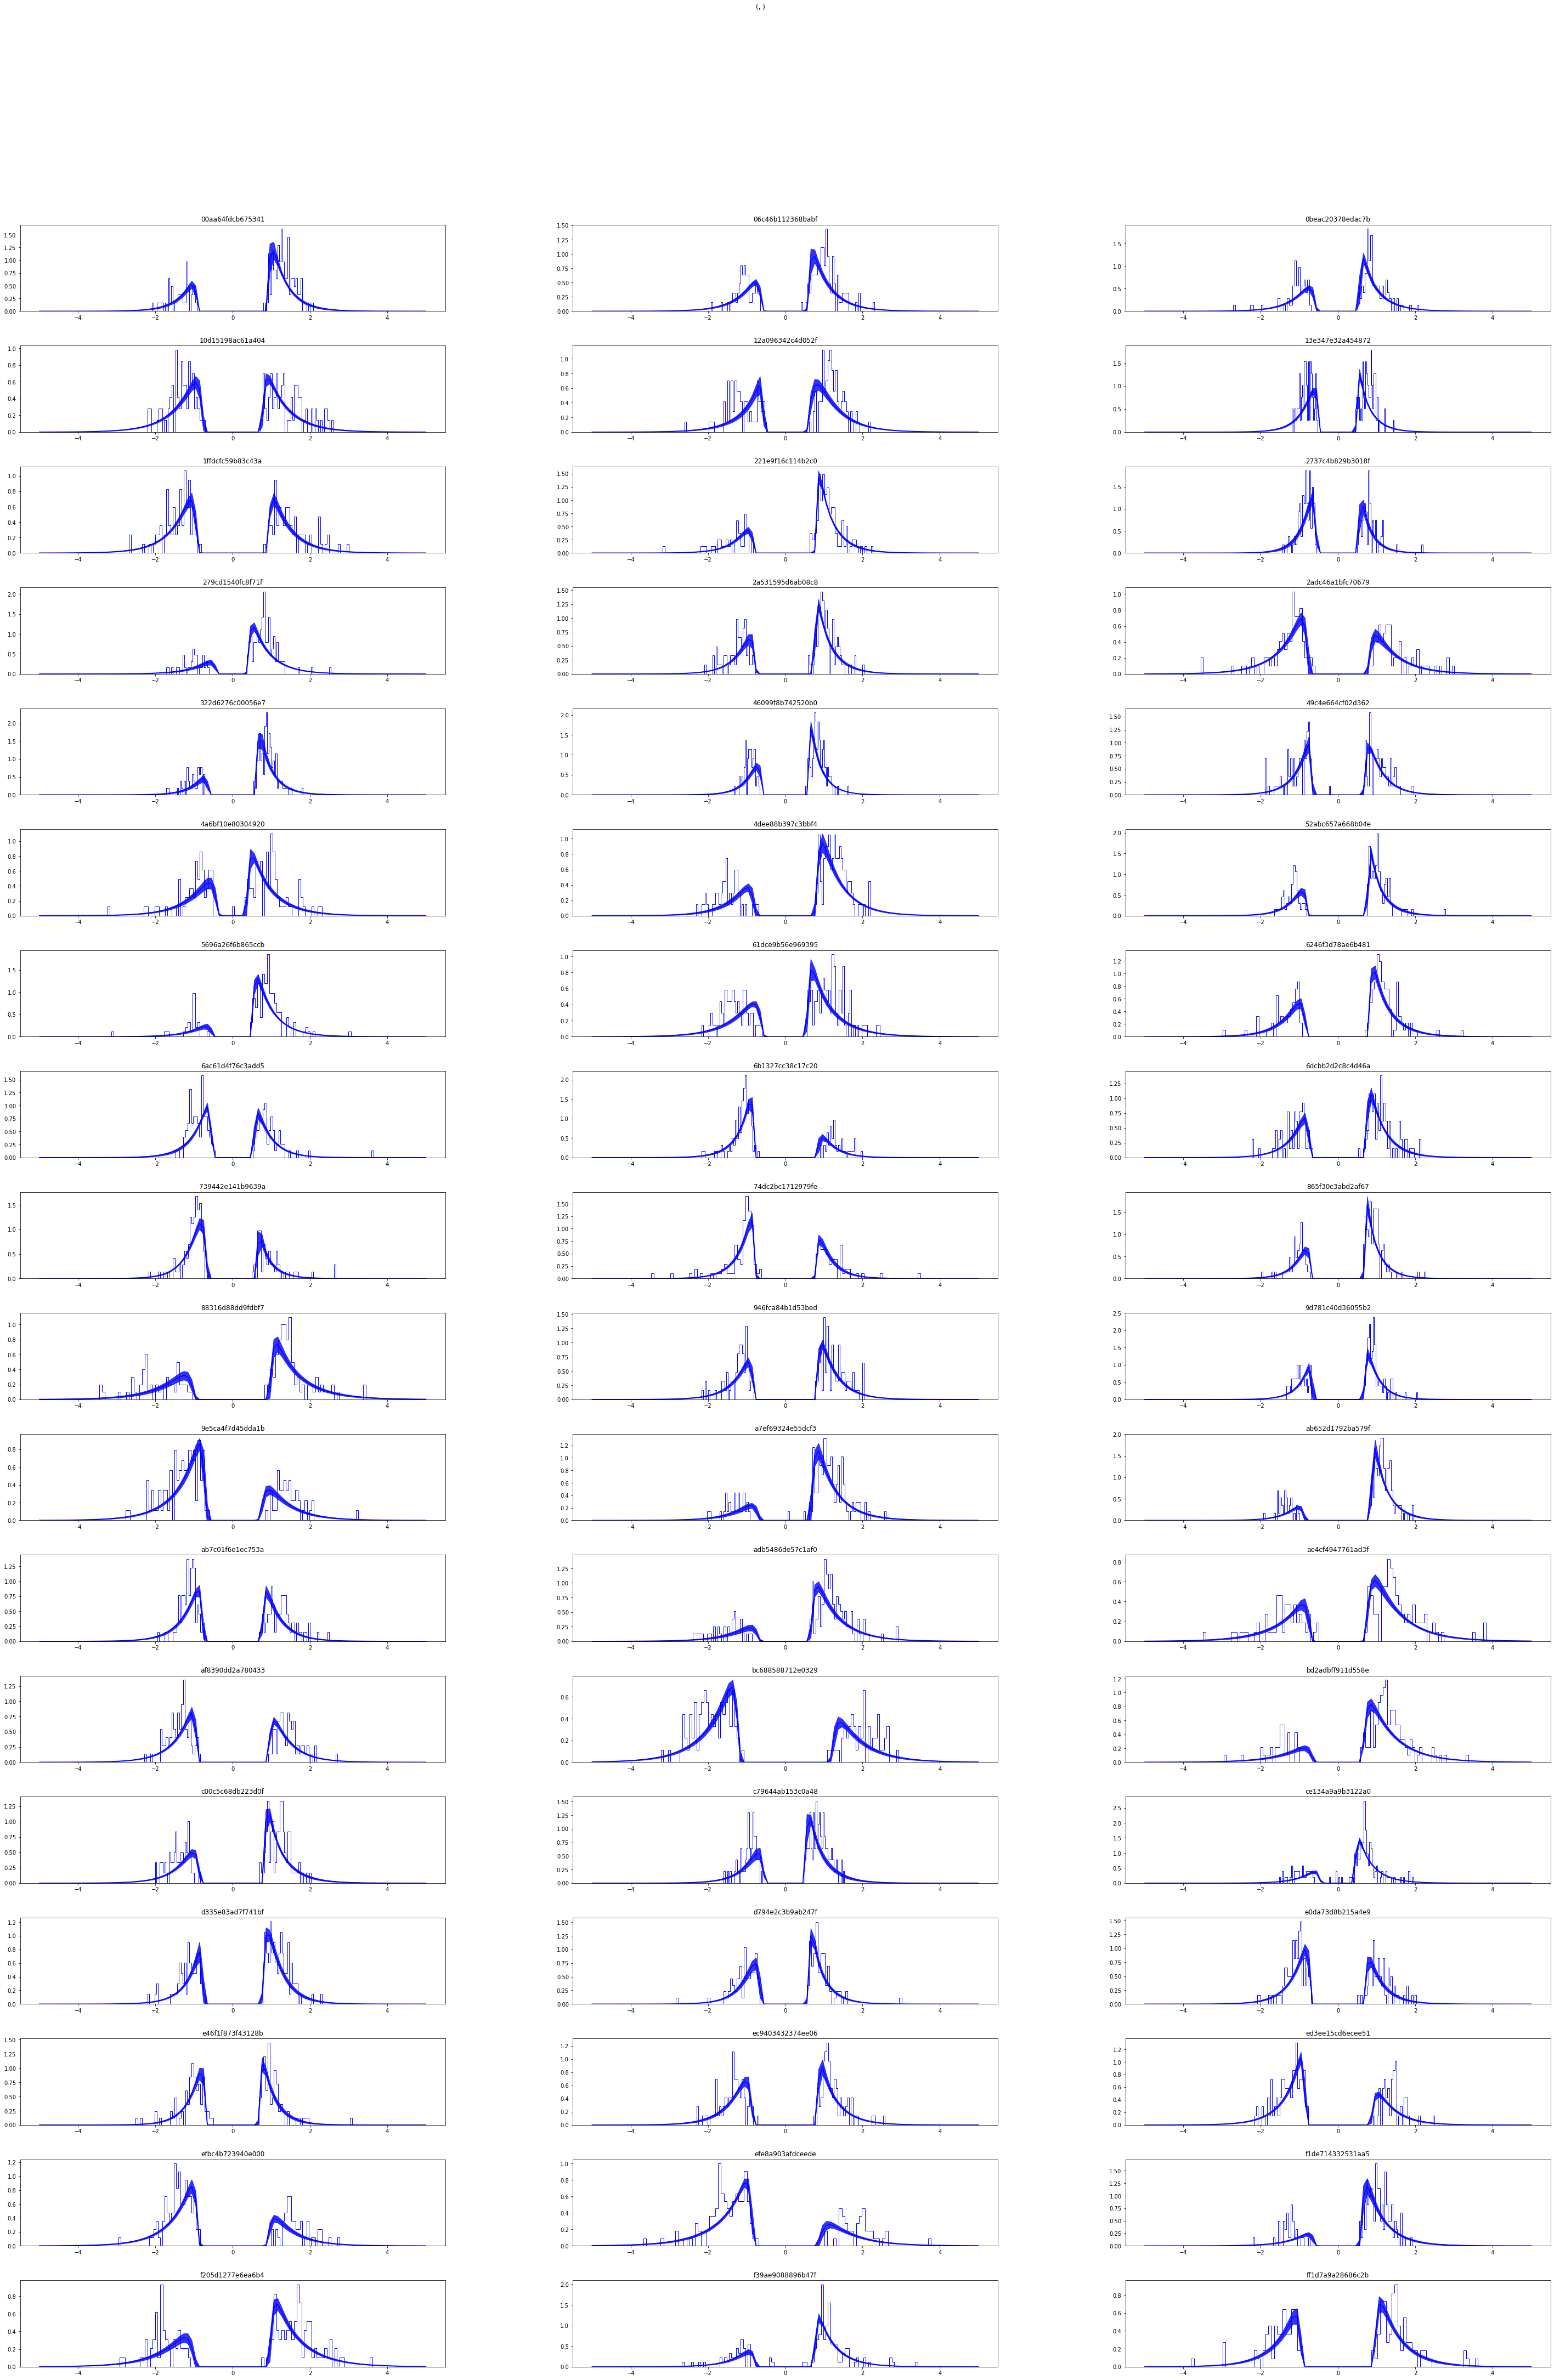

In [16]:
m.plot_posterior_predictive(figsize=(50, 70))